<a href="https://colab.research.google.com/github/sazzadhossain1906098/simple-linear-regression-/blob/main/linearreggression_Lab_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
## Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_csv("/content/clean_weather.csv", index_col=0)

# Fill in any missing values in the data with past values
df = df.ffill()

# Show the first 5 rows of the data
df.head(5)


,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


In [38]:
X=df[['tmax','tmin','rain']]
y=df.	tmax_tomorrow


In [39]:
from sklearn.model_selection import train_test_split

FEATURES = ["tmax", "tmin", "rain"]
TARGET = ["tmax_tomorrow"]

# Ensure we get the same split every time
np.random.seed(0)

# Split data into train and evaluation sets
train_df, eval_df = train_test_split(df, test_size=0.3, random_state=0)

# Further split evaluation set into validation and test sets
valid_df, test_df = train_test_split(eval_df, test_size=0.5, random_state=0)

# Extract features and target variables for training set
train_x = train_df[FEATURES].values
train_y = train_df[TARGET].values

# Extract features and target variables for validation set
valid_x = valid_df[FEATURES].values
valid_y = valid_df[TARGET].values

# Extract features and target variables for test set
test_x = test_df[FEATURES].values
test_y = test_df[TARGET].values

print(train_x.shape, train_y.shape)

(9456, 3) (9456, 1)


In [40]:
import math

def init_params(features):
    # Initialize model parameters
    # k is a scaling factor that we use to reduce the weights and biases initially
    k = math.sqrt(1 / features)

    # We set a random seed so if we re-run this code, we get the same results
    np.random.seed(0)

    weights = np.random.rand(features, 1) * 2 * k - k # scale and shift
    biases = np.ones((1, 1)) * 2 * k - k

    return [weights, biases]

In [41]:
def forward(params, x):
    weights, biases = params
    # Multiply x values by w values with matrix multiplication, then add b
    # Shape: [n, 3] x [3, 1] + [1, 1] => [n, 1]
    prediction = x @ weights + biases
    return prediction


In [42]:
def mse(actual, predicted):
    # Calculate mean squared error
    return np.mean((actual - predicted) ** 2)

def mse_grad(actual, predicted):
    # The derivative of mean squared error
    return 2 * (predicted - actual)  # shape: [n, 1]

In [43]:
def update_param(params, x, lr, grad):
    # Multiply the gradient by the x values
    # Divide x by the number of rows in x to avoid updates that are too large
    # x.shape => [n, 3]; grad.shape => [n, 1]
    w_grad = (x.T / x.shape[0]) @ grad
    b_grad = np.mean(grad, axis=0)

    # Update the weights and biases
    params[0] -= w_grad * lr
    params[1] -= b_grad * lr

    return params

In [44]:
from tqdm.notebook import tqdm

lr = 1e-4
epochs = 5000000
params = init_params(train_x.shape[1])  # step 1

train_loss_tracker = []
valid_loss_tracker = []
params_tracker = []

for i in tqdm(range(epochs), desc="epoch"):
    # Forward pass
    predictions = forward(params, train_x)  # step 2

    # Training loss
    train_loss = mse(train_y, predictions)  # step 3
    train_loss_tracker.append(train_loss)

    # Gradient calculation
    grad = mse_grad(train_y, predictions)  # step 4

    # Parameters update
    params = update_param(params, train_x, lr, grad)  # step 5
    params_tracker.append(params)

    # Validation loss
    predictions = forward(params, valid_x)
    valid_loss = mse(valid_y, predictions)
    valid_loss_tracker.append(valid_loss)

epoch:   0%|          | 0/5000000 [00:00<?, ?it/s]

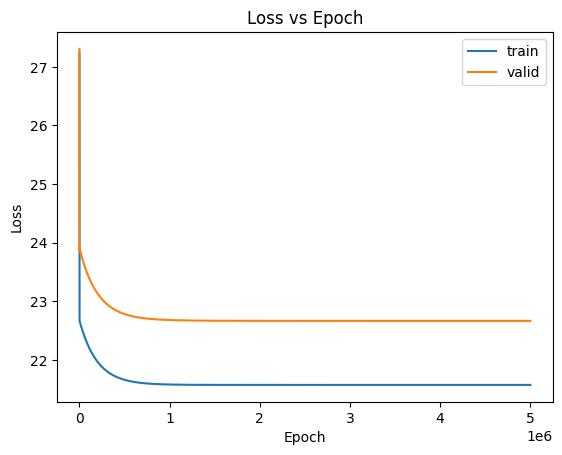

In [45]:
plt.plot(train_loss_tracker[10:], label='train')
plt.plot(valid_loss_tracker[10:], label='valid')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch");
plt.legend();

In [46]:
print(params)

[array([[ 0.72866922],
       [ 0.16610563],
       [-2.12409738]]), array([[9.60770298]])]


In [58]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(train_x,train_y)
reg.predict()

LinearRegression()

In [47]:
predictions = forward(params, test_x)
mse(test_y, predictions)

23.211767905420917

In [64]:
#comparing the result between the default value and my result
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the model
reg.fit(train_x, train_y)

# Predict using the model
reg.predict(test_x)
reg.coef_
reg.intercept_

array([9.60773243])

In [67]:
#y_prediction=reg.coef_*test_x+reg.intercept_
reg_mse=1/len(test_x)*sum((reg.predict(test_x)-test_y)**2)
reg_mse

array([23.21176686])